In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import seaborn as sns

import random

In [18]:
citrus = pd.read_csv("citrus.csv")
citrus

,name,diameter,weight,red,green,blue
0,orange,2.96,86.76,172,85,2
1,orange,3.91,88.05,166,78,3
2,orange,4.42,95.17,156,81,2
3,orange,4.47,95.60,163,81,4
4,orange,4.48,95.76,161,72,9
...,...,...,...,...,...,...
9995,grapefruit,15.35,253.89,149,77,20
9996,grapefruit,15.41,254.67,148,68,7
9997,grapefruit,15.59,256.50,168,82,20
9998,grapefruit,15.92,260.14,142,72,11


In [19]:
citrus = citrus.sample(frac=1).reset_index()
citrus = citrus.drop(columns="index")
citrus

,name,diameter,weight,red,green,blue
0,grapefruit,10.97,189.65,156,83,24
1,orange,6.70,126.44,144,89,2
2,grapefruit,13.50,228.78,154,58,15
3,orange,7.59,139.29,149,78,8
4,grapefruit,11.54,198.85,161,63,2
...,...,...,...,...,...,...
9995,grapefruit,10.98,189.92,163,54,2
9996,grapefruit,10.84,187.57,164,53,6
9997,orange,7.45,137.39,160,87,2
9998,grapefruit,12.72,216.61,156,72,2


In [20]:
print(citrus.isnull().sum())

name        0
diameter    0
weight      0
red         0
green       0
blue        0
dtype: int64


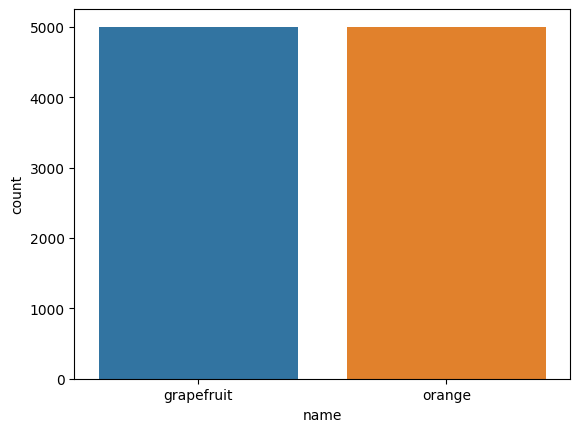

In [21]:
sns.countplot(x=citrus["name"], label="Count")
plt.show()

/tmp/ipykernel_46135/524991461.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  citrus_std = (citrus - citrus.mean()) / (citrus.std())


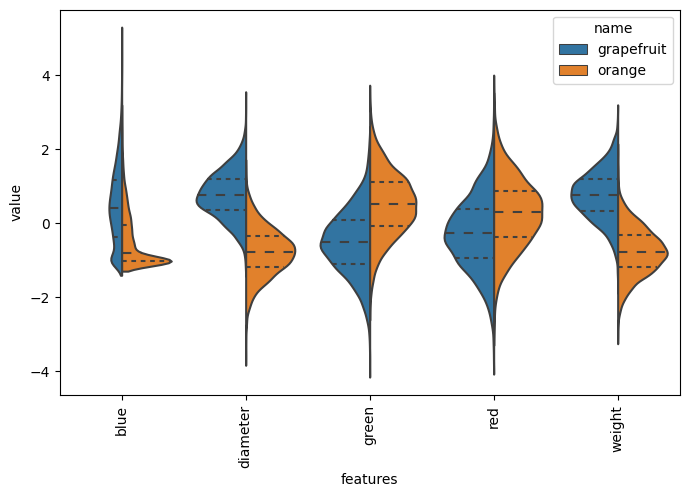

In [22]:
citrus_std = (citrus - citrus.mean()) / (citrus.std())
citrus_std['name'] = citrus['name']
citrus_std_melt = pd.melt(citrus_std, id_vars="name", var_name="features", value_name='value')

plt.figure(figsize=(8,5))
sns.violinplot(x="features", y="value", hue="name", data=citrus_std_melt, split=True, inner="quart")
plt.xticks(rotation=90)
plt.show()

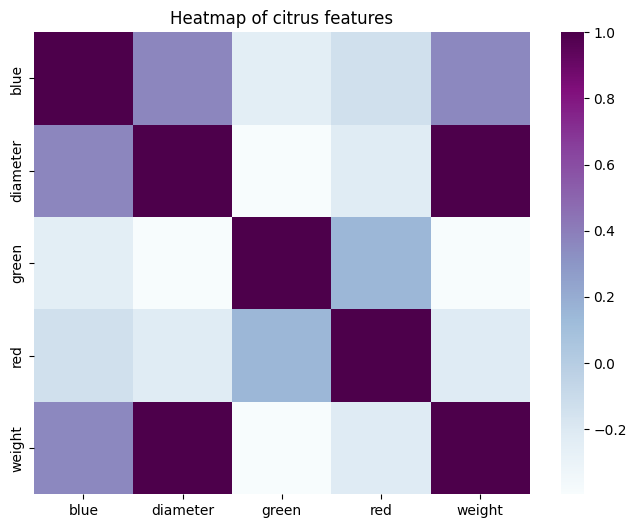

In [23]:
fig = plt.figure(figsize=(8,6))
sns.heatmap(citrus_std.corr(), cmap='BuPu').set_title("Heatmap of citrus features")
plt.show()

In [24]:
x = citrus_std.drop(columns = ['name'])
y = citrus_std['name']

Accuracy: 0.9593333333333334


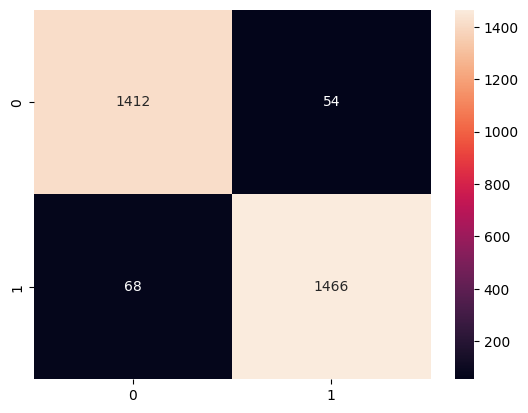

In [25]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=43)

rf = RandomForestClassifier(random_state=43)
rf = rf.fit(x_train,y_train)

y_hat = rf.predict(x_test)

print("Accuracy:", accuracy_score(y_test, y_hat) )

sns.heatmap(confusion_matrix(y_test, y_hat), annot=True, fmt="d")
plt.show()

Chosen best 2 feature by rfe: Index(['diameter', 'weight'], dtype='object')
Accuracy: 0.9953333333333333


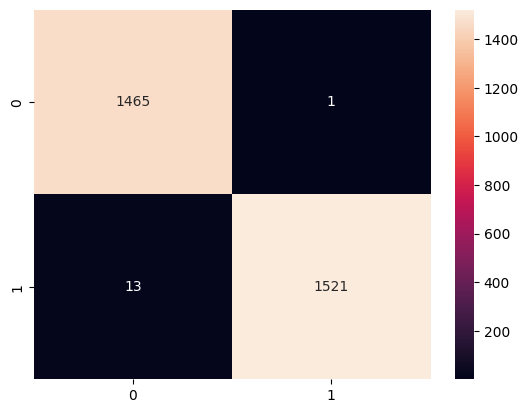

In [27]:
from sklearn.feature_selection import RFE

rf = RandomForestClassifier()

rfe = RFE(estimator=rf, n_features_to_select=2, step=1)
rfe = rfe.fit(x_train, y_train)

print('Chosen best 2 feature by rfe:',x_train.columns[rfe.support_])

x_train = x_train[x_train.columns[rfe.support_]] 
x_test = x_test[x_train.columns[rfe.support_]]

rf = RandomForestClassifier(random_state=43)

rf.fit(x_train,y_train)

print('Accuracy:', accuracy_score(y_test, rf.predict(x_test)))

sns.heatmap(confusion_matrix(y_test, rf.predict(x_test)), annot=True, fmt="d")
plt.show()